In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [2]:
# conda install nbconvert

In [3]:
file_loc = r'C:\Users\nkuma\Downloads\EE 798Q\Open pit blasting.csv'
air_pollution_data = pd.read_csv(file_loc, index_col=0,  header = 0)

In [4]:
air_pollution_data.head(1)

,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4


In [5]:
df = pd.DataFrame(air_pollution_data)

In [6]:
df.columns = ['From','To','PM10(µg/m3)','PM2.5(µg/m3)','NO(µg/m3)','NO2(µg/m3)','NOX(ppb)','CO(mg/m3)','SO2(µg/m3)','NH3(µg/m3)','Ozone(µg/m3)','Benzene(µg/m3)']

In [7]:
df.head(1)

,From,To,PM10(µg/m3),PM2.5(µg/m3),NO(µg/m3),NO2(µg/m3),NOX(ppb),CO(mg/m3),SO2(µg/m3),NH3(µg/m3),Ozone(µg/m3),Benzene(µg/m3)
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4


In [8]:
df['PM10(µg/m3)'].fillna(df['PM10(µg/m3)'][8643], inplace = True)
df['PM2.5(µg/m3)'].fillna(df['PM2.5(µg/m3)'][8643], inplace = True)
df['NO(µg/m3)'].fillna(df['NO(µg/m3)'][8643], inplace = True)
df['NO2(µg/m3)'].fillna(df['NO2(µg/m3)'][8643], inplace = True)
df['NOX(ppb)'].fillna(df['NOX(ppb)'][8643], inplace = True)
df['CO(mg/m3)'].fillna(df['CO(mg/m3)'][8643], inplace = True)
df['SO2(µg/m3)'].fillna(df['SO2(µg/m3)'][8643], inplace = True)
df['NH3(µg/m3)'].fillna(df['NH3(µg/m3)'][8643], inplace = True)
df['Ozone(µg/m3)'].fillna(df['Ozone(µg/m3)'][8643], inplace = True)
df['Benzene(µg/m3)'].fillna(df['Benzene(µg/m3)'][8643], inplace = True)

In [9]:
df.head(1)

,From,To,PM10(µg/m3),PM2.5(µg/m3),NO(µg/m3),NO2(µg/m3),NOX(ppb),CO(mg/m3),SO2(µg/m3),NH3(µg/m3),Ozone(µg/m3),Benzene(µg/m3)
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,14.65,90.1,56.2,0.31,34.23,17.7,28.1,0.4


In [10]:
df = df[:-3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   From            8640 non-null   object 
 1   To              8640 non-null   object 
 2   PM10(µg/m3)     8640 non-null   float64
 3   PM2.5(µg/m3)    8640 non-null   float64
 4   NO(µg/m3)       8640 non-null   float64
 5   NO2(µg/m3)      8640 non-null   float64
 6   NOX(ppb)        8640 non-null   float64
 7   CO(mg/m3)       8640 non-null   float64
 8   SO2(µg/m3)      8640 non-null   float64
 9   NH3(µg/m3)      8640 non-null   float64
 10  Ozone(µg/m3)    8640 non-null   float64
 11  Benzene(µg/m3)  8640 non-null   float64
dtypes: float64(10), object(2)
memory usage: 877.5+ KB


In [11]:
df['To'] = pd.to_datetime(df['To'],format='%Y-%m-%d %H:%M:%S')
df['From'] = pd.to_datetime(df['From'], format = '%Y-%m-%d %H:%M:%S')
t = df['To'][8040]
t

Timestamp('2023-04-25 18:00:00')

In [12]:
df.drop(['From'], axis = 1, inplace = True)

<IPython.core.display.Javascript object>


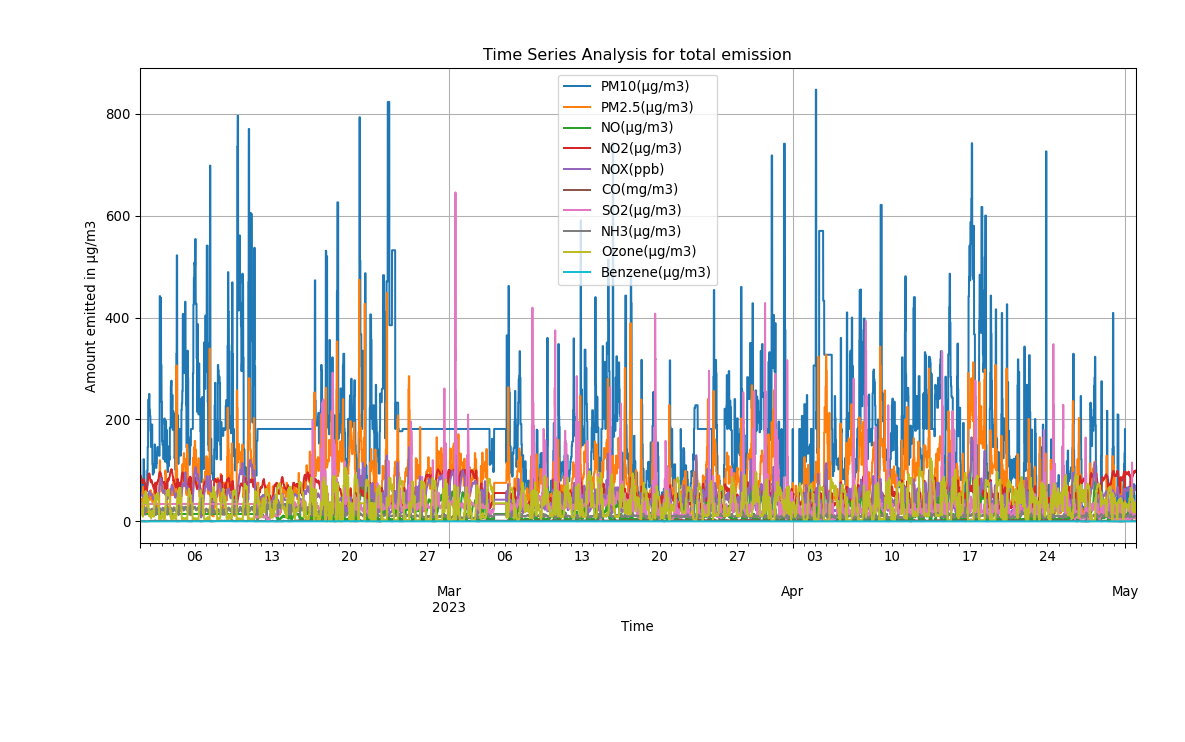

In [13]:
%matplotlib notebook

df.set_index(['To'], inplace=True)
df.plot()
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Time Series Analysis for total emission')
plt.tight_layout()
plt.grid()
plt.legend()

# NH3 Prediction

In [14]:
PM10 = df['PM10(µg/m3)']
PM25 = df['PM2.5(µg/m3)']
NO = df['NO(µg/m3)']
NO2 = df['NO2(µg/m3)']
NOX = df['NOX(ppb)']
CO = df['CO(mg/m3)']
SO2 = df['SO2(µg/m3)']
NH3 = df['NH3(µg/m3)']
OZONE = df['Ozone(µg/m3)']
BENZENE = df['Benzene(µg/m3)']

In [15]:
mask = (df.index <= t)
training_data = df[mask].copy()
testing_data = df[~mask].copy()

<IPython.core.display.Javascript object>


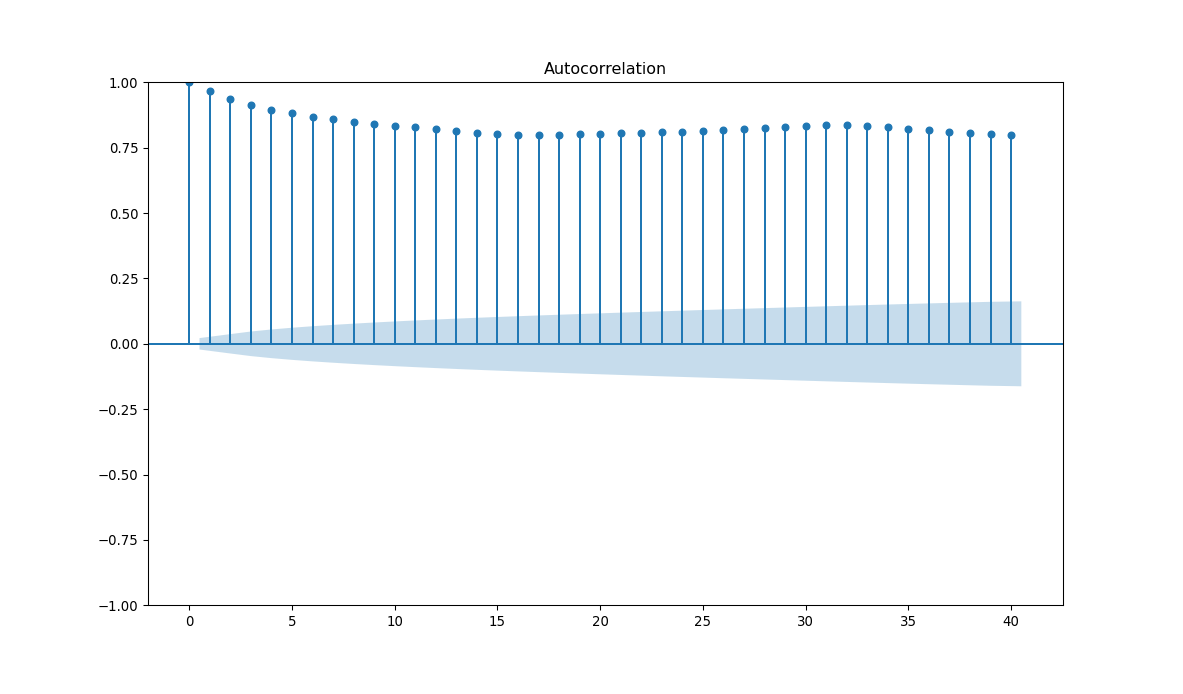

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


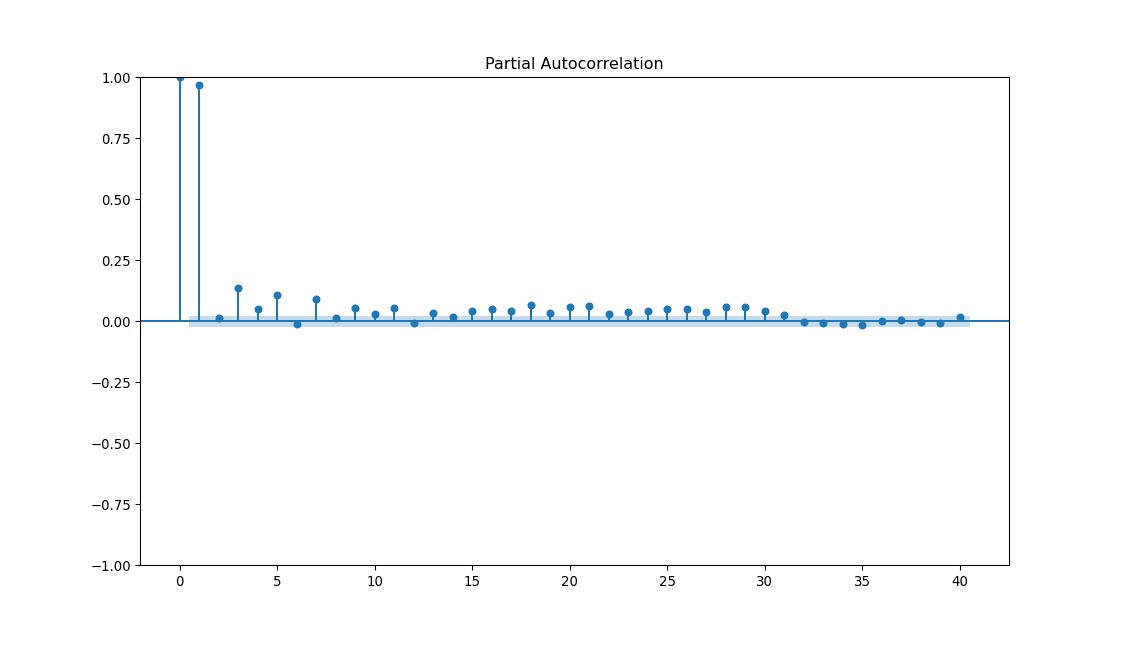

In [16]:
acf_plot = plot_acf(training_data['NH3(µg/m3)'])
pacf_plot = plot_pacf(training_data['NH3(µg/m3)'])

In [17]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(training_data['NH3(µg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 0.05551486990782443


Now our p-value is small but not smaller than 0.05 se we may go for first order differencing

Hence we set d = 1

In [18]:
from pmdarima.arima import auto_arima

def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=5, max_q=3, d=1, test="adf", trace = True)
    return autoarima_model

In [19]:
arima_model = arimamodel(training_data['NH3(µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30425.822, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30419.704, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30416.155, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30423.825, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29813.346, Time=2.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29781.994, Time=5.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=30238.870, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29752.191, Time=4.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=30209.453, Time=0.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=30082.312, Time=3.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29690.890, Time=9.70 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29689.111, Time=6.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29775.998, Time=3.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29690.880, Time=8.14 sec
 ARIMA(1,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -14836.232
Date:                Wed, 28 Jun 2023   AIC                          29686.464
Time:                        06:38:50   BIC                          29735.409
Sample:                    02-01-2023   HQIC                         29703.213
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8263      0.127     -6.496      0.000      -1.076      -0.577
ar.L2          0.6262      0.008     77.641      0.000       0.610       0.642
ar.L3          0.5582      0.076      7.331      0.000       0.409       0.707
ma.L1          0.7255      0.128      5.668      0.000       0.475       0.976
ma.L2         -0.9263      0.017    -54.508      0.000      -0.960      -0.893
ma.L3         -0.7313      0.106     -6.887      0.000      -0.939      -0.523
sigma2         2.3467      0.008    277.824      0.000       2.330       2.363
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):           1985266.85
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -2.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


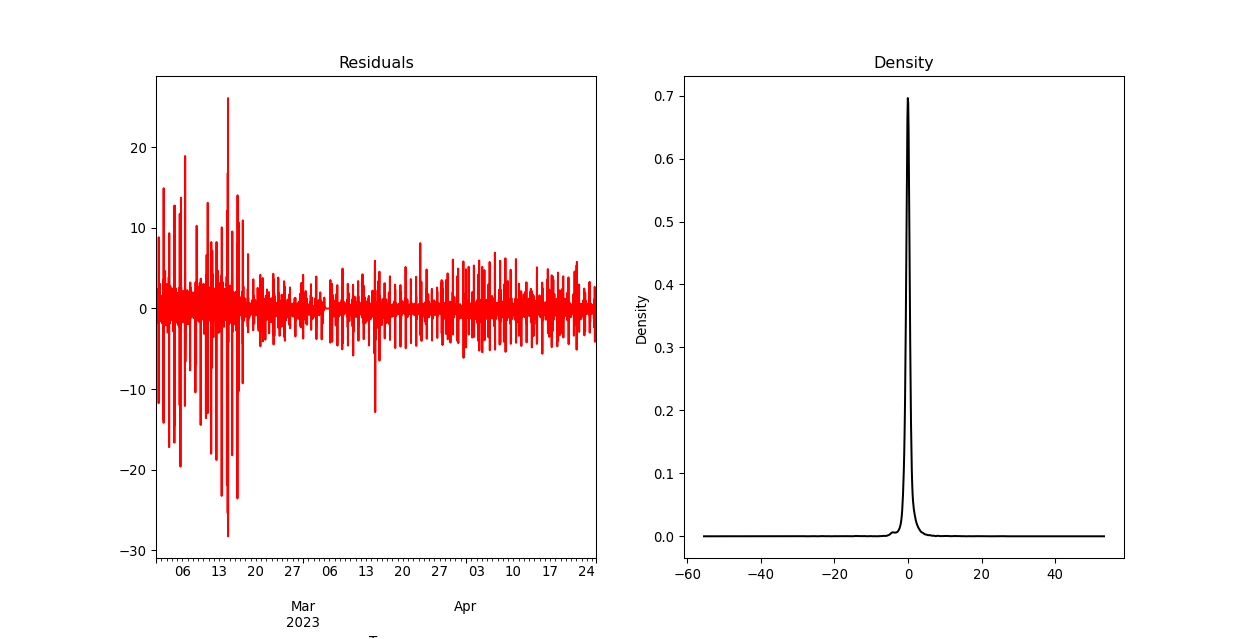

In [44]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(training_data['NH3(µg/m3)'], order=(3, 1, 3))  # Replace p, d, q with appropriate values
arima_model_fit = arima_model.fit()

# Access the residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals' , ax = ax[0] ,color = 'r')
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1], color = 'black')
plt.show()

It is easily visible that our residual is similar to white noise as it has zero mean and almost constant variance

In [20]:
test_auto = arima_model.predict(n_periods = len(testing_data['NH3(µg/m3)']))
df['NH3 forecast'] = [None]*len(training_data['NH3(µg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


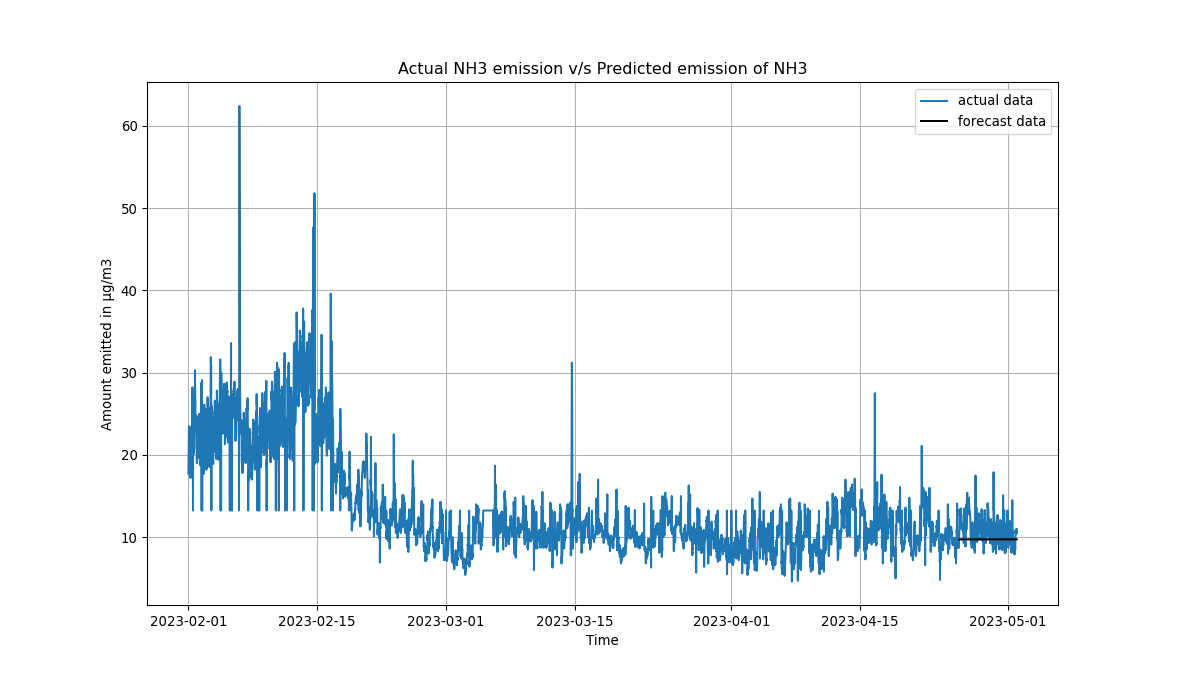

In [21]:
%matplotlib notebook
plt.plot(NH3, label='actual data')
plt.plot(df['NH3 forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual NH3 emission v/s Predicted emission of NH3')
plt.grid()
plt.legend()
plt.show()

In [22]:
column_to_save = df['NH3 forecast']
new_df = pd.DataFrame(column_to_save, columns=['NH3 forecast'])
new_df.to_csv('NH3_forecast.csv', index=True)

In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                        K.epsilon(),
                                        None))
    return 100. * K.mean(diff, axis=-1)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(testing_data['NH3(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['NH3(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['NH3(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 1.581571800700198
mape : 0.13561509985800893
rmse : 2.0193646825076073


As we can see that our mean absolute percentage error is 0.14% which is pretty less so our prediction is almost accurate and we can rely on our prediction

# Ozone Prediction

<IPython.core.display.Javascript object>


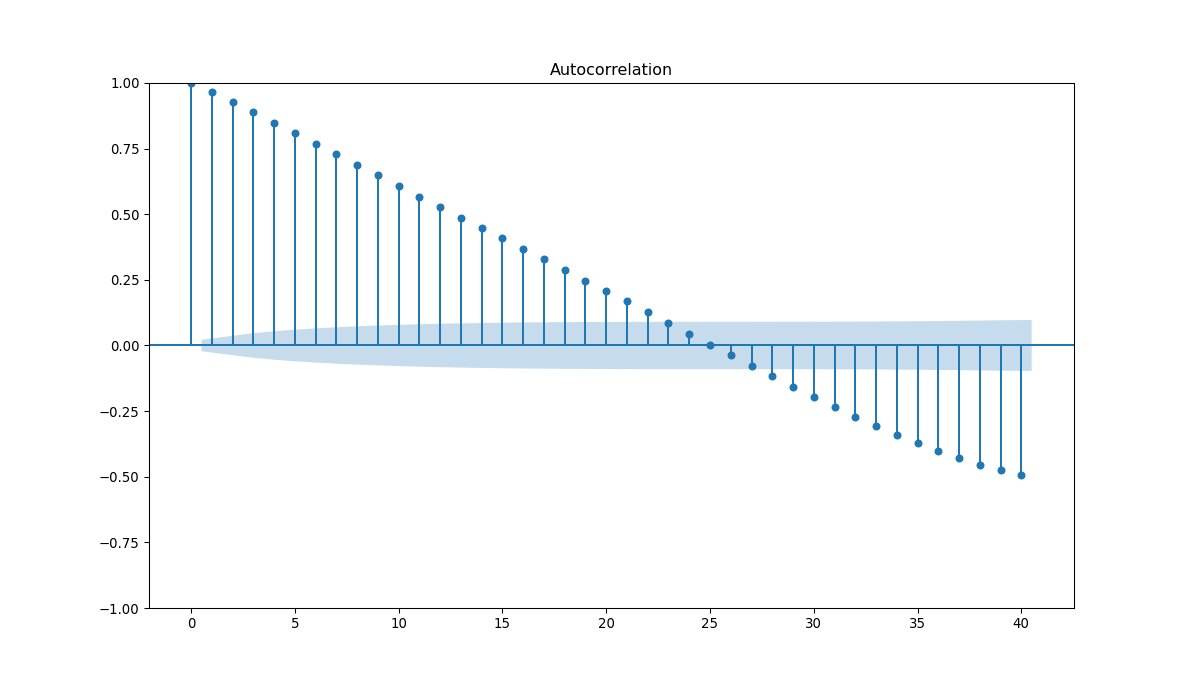

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


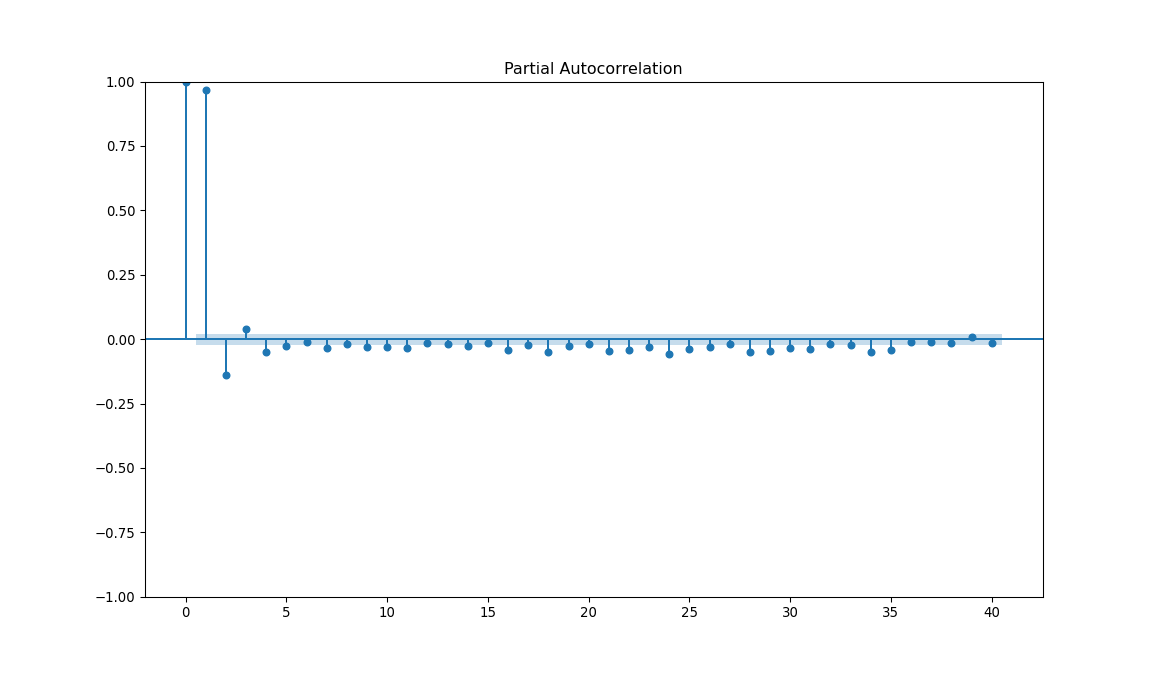

In [20]:
acf_plot = plot_acf(training_data['Ozone(µg/m3)'])
pacf_plot = plot_pacf(training_data['Ozone(µg/m3)'])

Now gradually decaying acf plot and no significant lag in pacf plot after lag=2 suggests that our q value should be 0 and p should be 2

In [28]:
adf_test = adfuller(training_data['Ozone(µg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 0.0


Great p value. Hence our time series is stationary.
We set our d = 0

In [29]:
def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=3, max_q=2, d=0, test="adf", trace = True)
    return autoarima_model

In [30]:
arima_model = arimamodel(training_data['Ozone(µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=75530.319, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=53559.398, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=66754.065, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=83727.974, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=53404.544, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=53394.756, Time=1.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=53389.161, Time=3.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=53387.382, Time=2.39 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=53392.751, Time=1.07 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=53389.244, Time=3.76 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=53389.036, Time=1.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=53388.763, Time=7.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=53491.463, Time=1.00 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 23.526 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -26688.691
Date:                Mon, 26 Jun 2023   AIC                          53387.382
Time:                        22:28:47   BIC                          53422.343
Sample:                    02-01-2023   HQIC                         53399.346
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7320      0.243      7.141      0.000       1.257       2.207
ar.L1          0.7585      0.038     19.766      0.000       0.683       0.834
ar.L2          0.1925      0.037      5.195      0.000       0.120       0.265
ma.L1          0.3495      0.036      9.838      0.000       0.280       0.419
sigma2        44.7348      0.320    139.601      0.000      44.107      45.363
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             54902.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
test_auto = arima_model.predict(n_periods = len(testing_data['Ozone(µg/m3)']))
df['Ozone forecast'] = [None]*len(training_data['Ozone(µg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


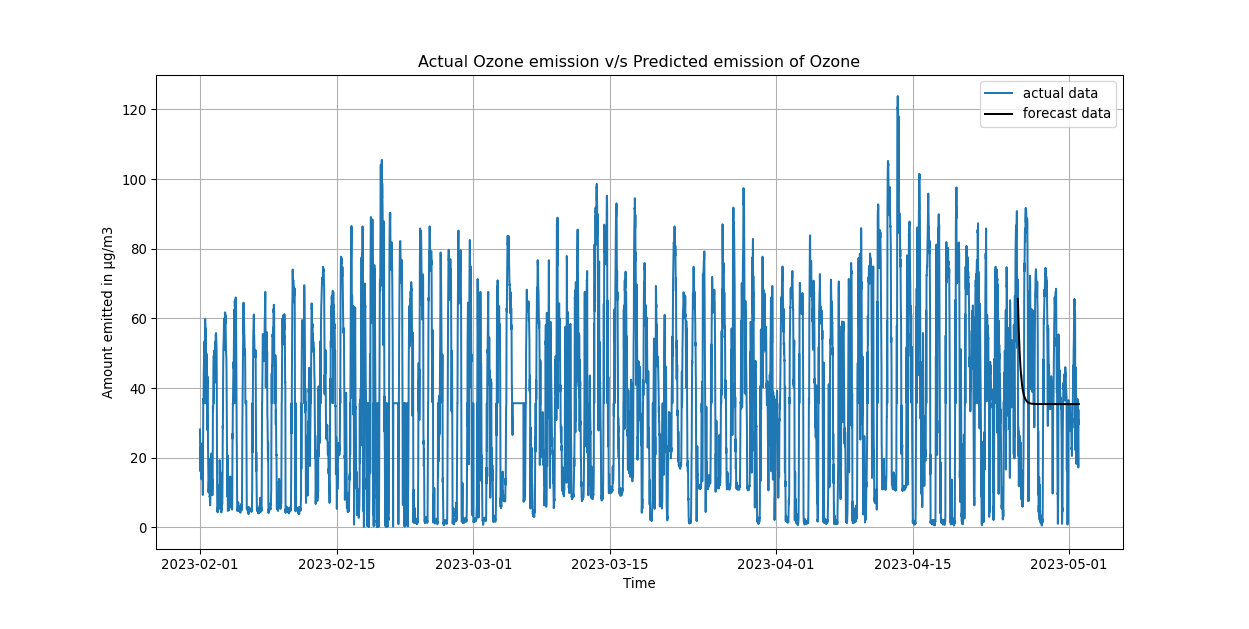

In [32]:
%matplotlib notebook
plt.plot(OZONE, label='actual data')
plt.plot(df['Ozone forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual Ozone emission v/s Predicted emission of Ozone')
plt.grid()
plt.legend()
plt.show()

In [33]:
column_to_save = df['Ozone forecast']
new_df = pd.DataFrame(column_to_save, columns=['Ozone forecast'])
new_df.to_csv('Ozone_forecast.csv', index=True)

In [34]:
mae = mean_absolute_error(testing_data['Ozone(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['Ozone(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['Ozone(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 19.595894185231344
mape : 2.0483620284036137
rmse : 24.075587101272223


So our mean absolute percentage error is 2% which is not so good and our predictions may vary much from the actual data

# SO2 prediction

<IPython.core.display.Javascript object>


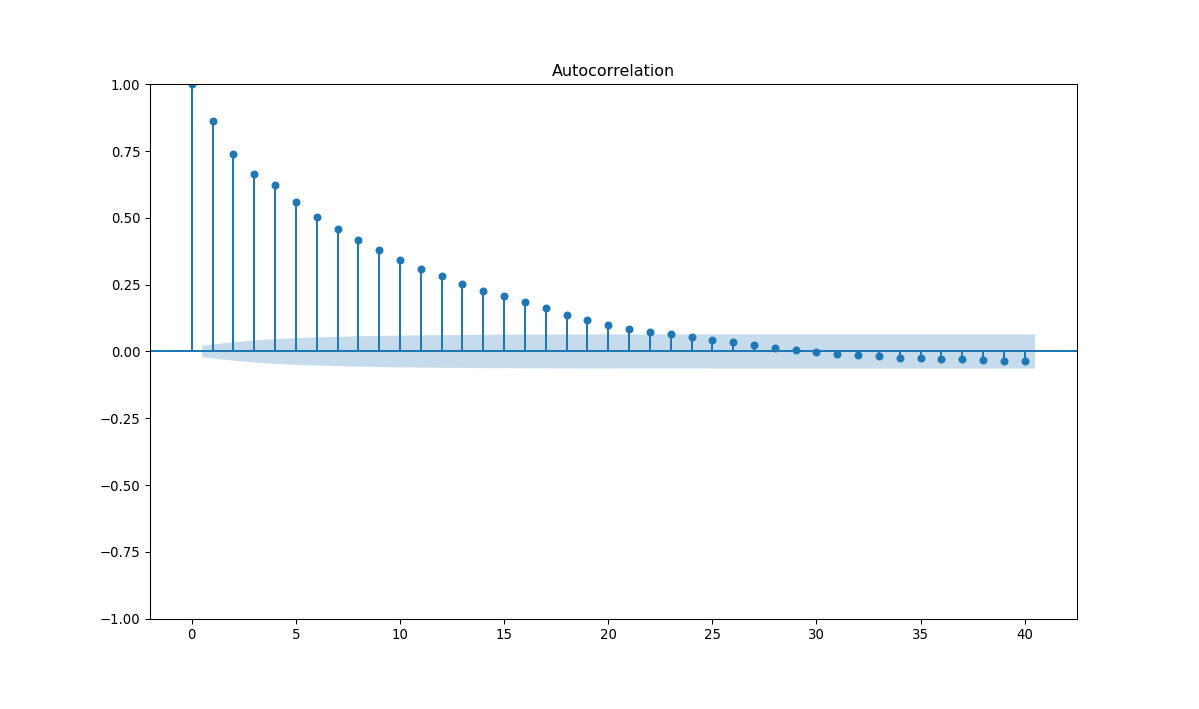

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


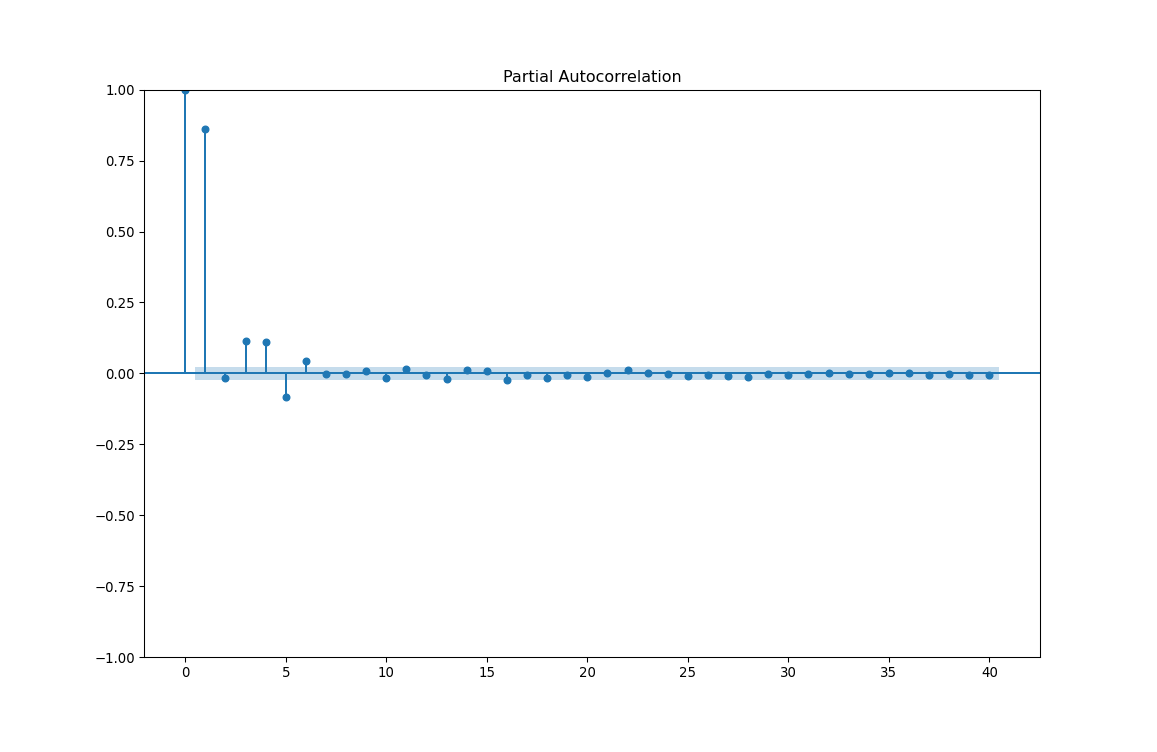

In [21]:
acf_plot = plot_acf(training_data['SO2(µg/m3)'])
pacf_plot = plot_pacf(training_data['SO2(µg/m3)'])

Above plots is similar to acf and pacf plots of Ozone so we may consider our q to be 0

In [22]:
adf_test = adfuller(training_data['SO2(µg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 2.8685625887686045e-30


Almost 0 p-value so we may assume our d to be 0

In [23]:
def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=5, max_q=2, d=0, test="adf", trace = True)
    return autoarima_model

In [24]:
arima_model = arimamodel(training_data['SO2(µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80769.557, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69820.316, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=74928.310, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86051.452, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=69820.274, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=69719.046, Time=0.54 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=69620.044, Time=0.55 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=69563.960, Time=0.66 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=69553.787, Time=6.75 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=69559.339, Time=5.56 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=69552.515, Time=11.23 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=69551.246, Time=7.79 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=69647.796, Time=3.92 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=69677.876, Time=3.90 sec
 ARIMA(4,0,2)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(4, 0, 2)   Log Likelihood              -34767.623
Date:                Wed, 28 Jun 2023   AIC                          69551.246
Time:                        06:40:26   BIC                          69607.183
Sample:                    02-01-2023   HQIC                         69570.387
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5649      0.784      9.655      0.000       6.029       9.101
ar.L1          0.2417      0.021     11.490      0.000       0.200       0.283
ar.L2          0.2608      0.025     10.335      0.000       0.211       0.310
ar.L3          0.1070      0.021      5.005      0.000       0.065       0.149
ar.L4          0.1767      0.004     45.665      0.000       0.169       0.184
ma.L1          0.6375      0.022     28.897      0.000       0.594       0.681
ma.L2          0.1916      0.025      7.699      0.000       0.143       0.240
sigma2       333.8149      1.126    296.522      0.000     331.608     336.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2945261.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.61   Skew:                             4.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        96.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
test_auto = arima_model.predict(n_periods = len(testing_data['SO2(µg/m3)']))
df['SO2 forecast'] = [None]*len(training_data['SO2(µg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


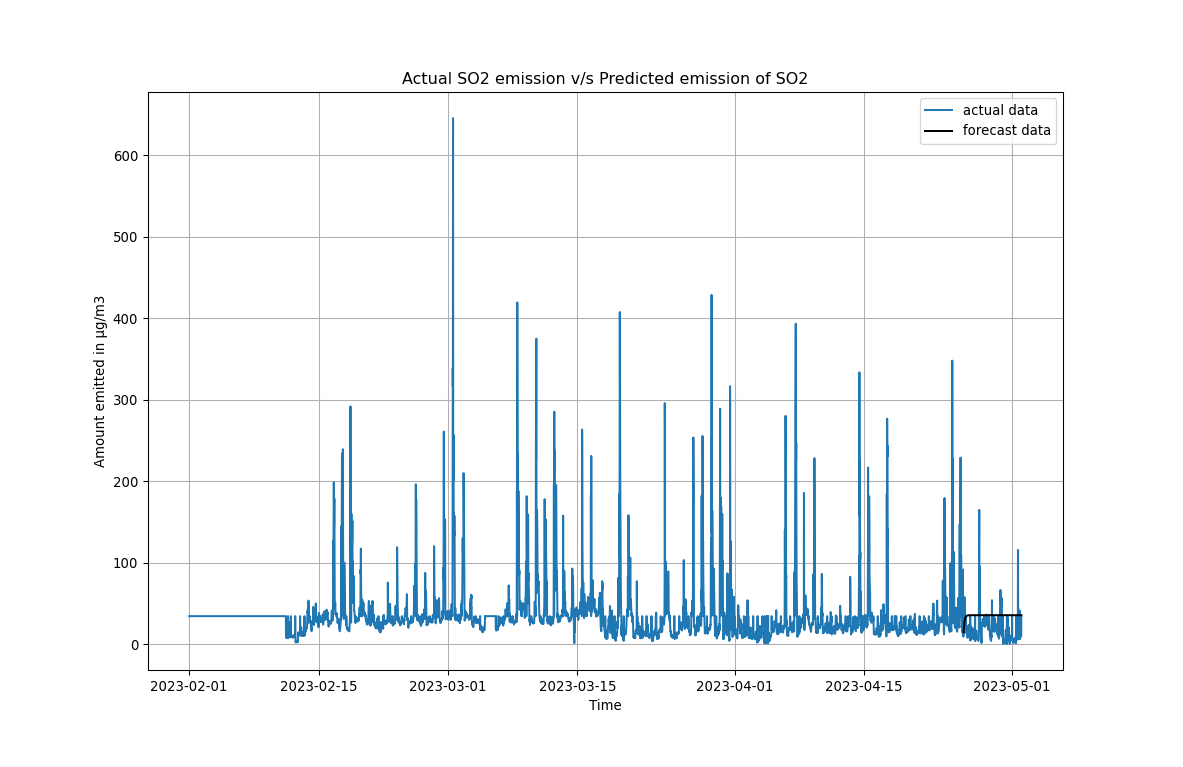

In [26]:
%matplotlib notebook
plt.plot(SO2, label='actual data')
plt.plot(df['SO2 forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual SO2 emission v/s Predicted emission of SO2')
plt.grid()
plt.legend()
plt.show()

In [41]:
column_to_save = df['SO2 forecast']
new_df = pd.DataFrame(column_to_save, columns=['SO2 forecast'])
new_df.to_csv('SO2_forecast.csv', index=True)

In [42]:
mae = mean_absolute_error(testing_data['SO2(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['SO2(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['SO2(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 21.075799474716653
mape : 4.642926283330749
rmse : 24.23995109524837


4% mean absolute error which is also pretty bad so we will mostly get our predictions wrong when preicting SO2 emission during blasting

# CO Prediction

<IPython.core.display.Javascript object>


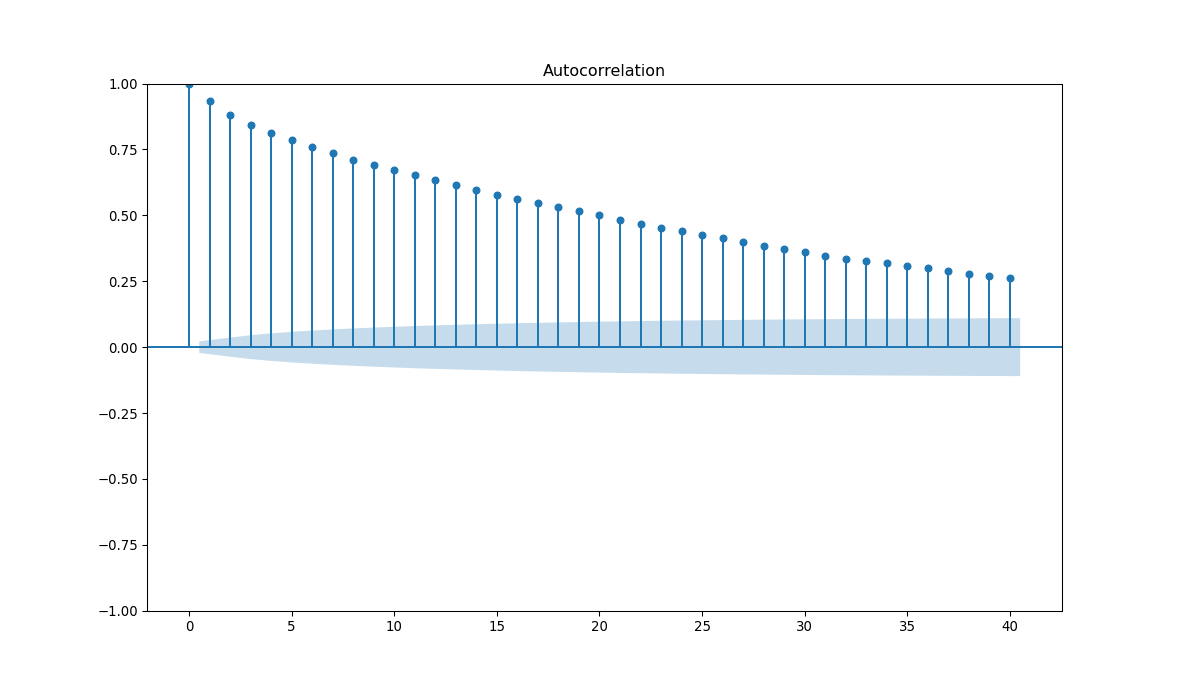

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


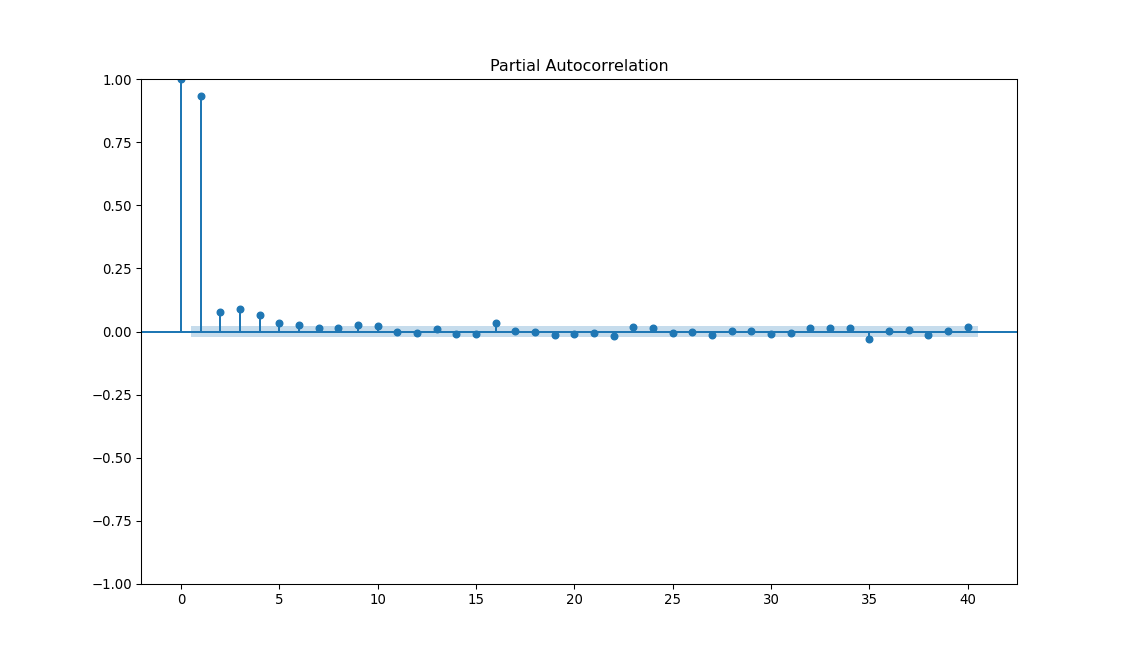

In [28]:
acf_plot = plot_acf(training_data['CO(mg/m3)'])
pacf_plot = plot_pacf(training_data['CO(mg/m3)'])

In [31]:
adf_test = adfuller(training_data['CO(mg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 7.482354289581422e-19


In [32]:
def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=4, max_q=2, d=0, test="adf", trace = True)
    return autoarima_model

In [33]:
arima_model = arimamodel(training_data['CO(mg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14437.368, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2140.205, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7189.309, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30040.430, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2187.767, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2252.640, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-2283.944, Time=0.89 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-2301.395, Time=7.70 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2303.847, Time=6.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2300.180, Time=5.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2298.339, Time=9.54 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2304.230, Time=7.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2276.671, Time=2.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2200.159, Time=1.64 sec
 ARIMA(2,0,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(2, 0, 2)   Log Likelihood                1158.115
Date:                Wed, 28 Jun 2023   AIC                          -2304.230
Time:                        06:42:19   BIC                          -2262.277
Sample:                    02-01-2023   HQIC                         -2289.874
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0213      0.004      5.246      0.000       0.013       0.029
ar.L1          1.4713      0.052     28.536      0.000       1.370       1.572
ar.L2         -0.4860      0.049     -9.877      0.000      -0.582      -0.390
ma.L1         -0.6273      0.052    -12.011      0.000      -0.730      -0.525
ma.L2         -0.0456      0.013     -3.522      0.000      -0.071      -0.020
sigma2         0.0439      0.000    141.526      0.000       0.043       0.044
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             53780.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.47
Prob(H) (two-sided):                  0.92   Kurtosis:                        15.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


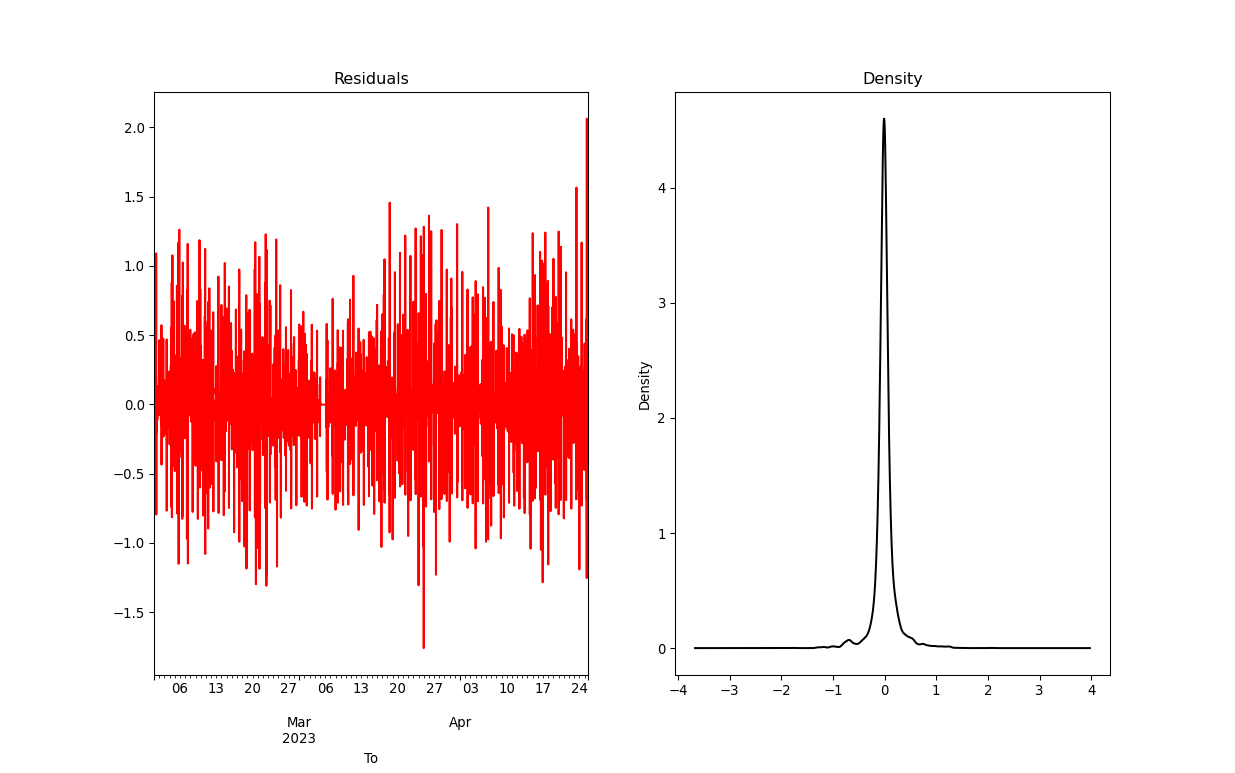

In [78]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(training_data['CO(mg/m3)'], order=(2, 0, 2))  # Replace p, d, q with appropriate values
arima_model_fit = arima_model.fit()

# Access the residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals' , ax = ax[0] ,color = 'r')
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1], color = 'black')
plt.show()

In [34]:
test_auto = arima_model.predict(n_periods = len(testing_data['CO(mg/m3)']))
df['CO forecast'] = [None]*len(training_data['CO(mg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


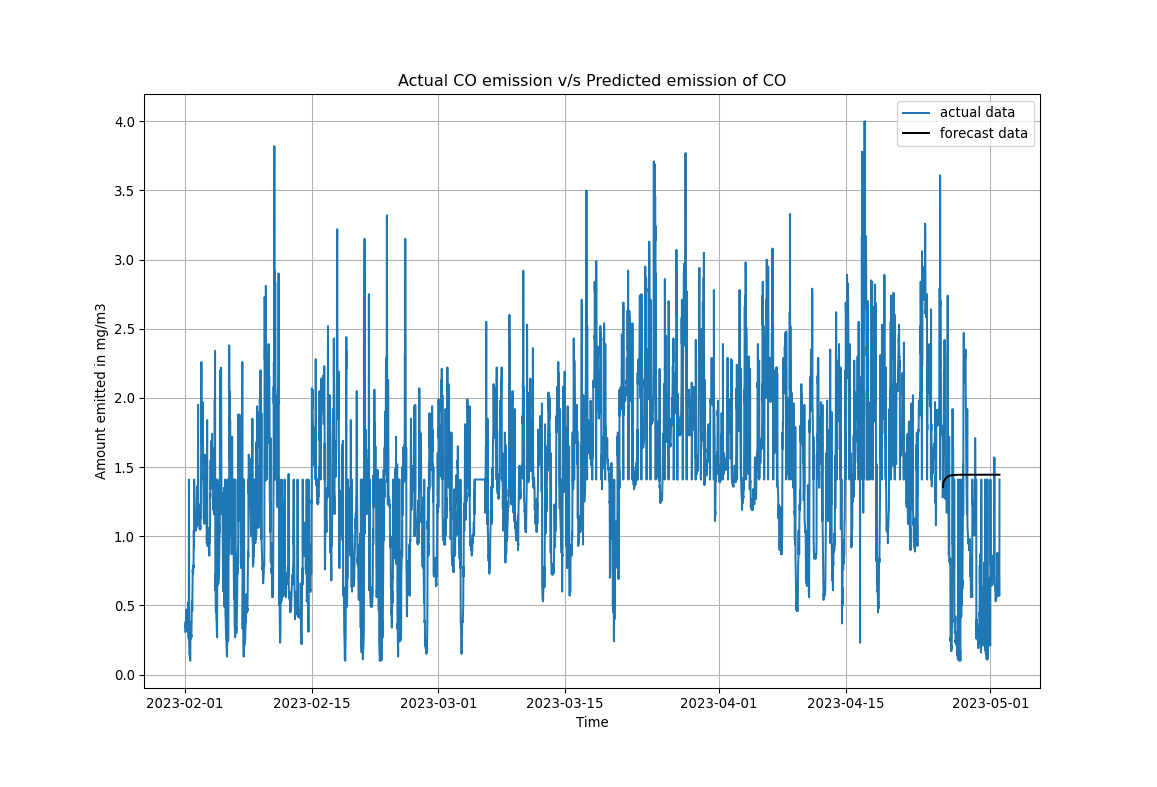

In [35]:
%matplotlib notebook
plt.plot(CO, label='actual data')
plt.plot(df['CO forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in mg/m3')
plt.title('Actual CO emission v/s Predicted emission of CO')
plt.grid()
plt.legend()
plt.show()

In [49]:
column_to_save = df['CO forecast']
new_df = pd.DataFrame(column_to_save, columns=['CO forecast'])
new_df.to_csv('CO_forecast.csv', index=True)

In [50]:
mae = mean_absolute_error(testing_data['CO(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['CO(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['CO(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 0.7370925273384792
mape : 2.1637841040951056
rmse : 0.837211040609599


# Benzene Prediction

<IPython.core.display.Javascript object>


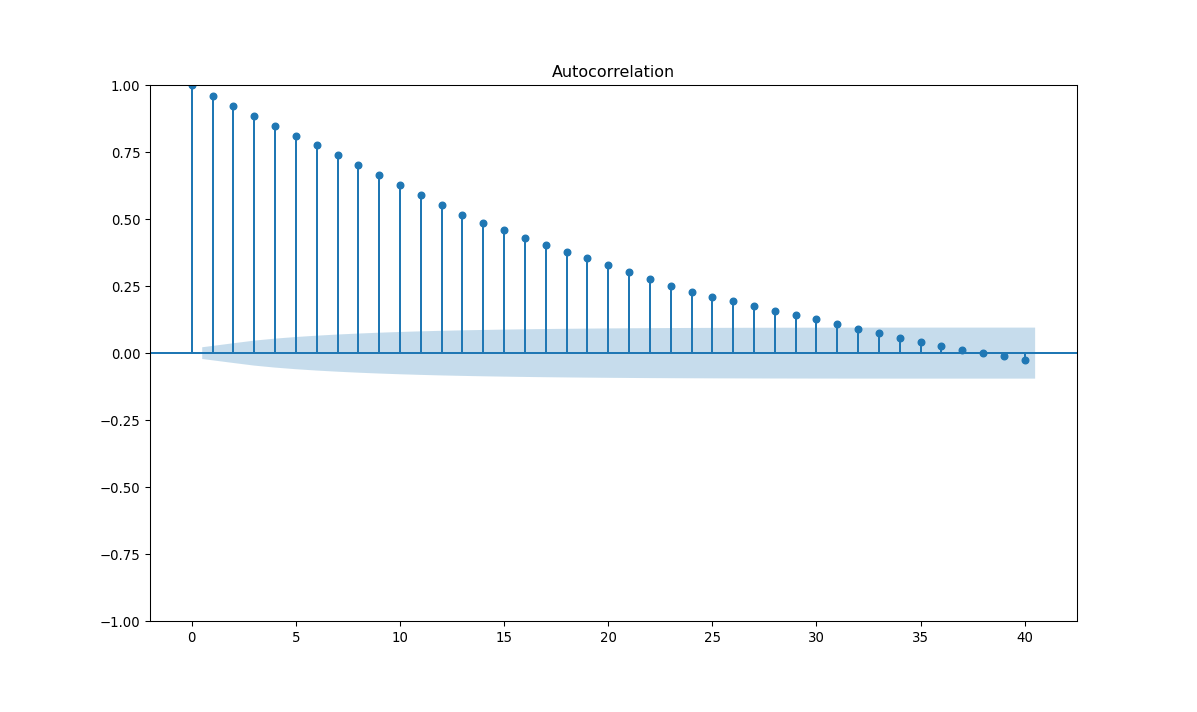

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


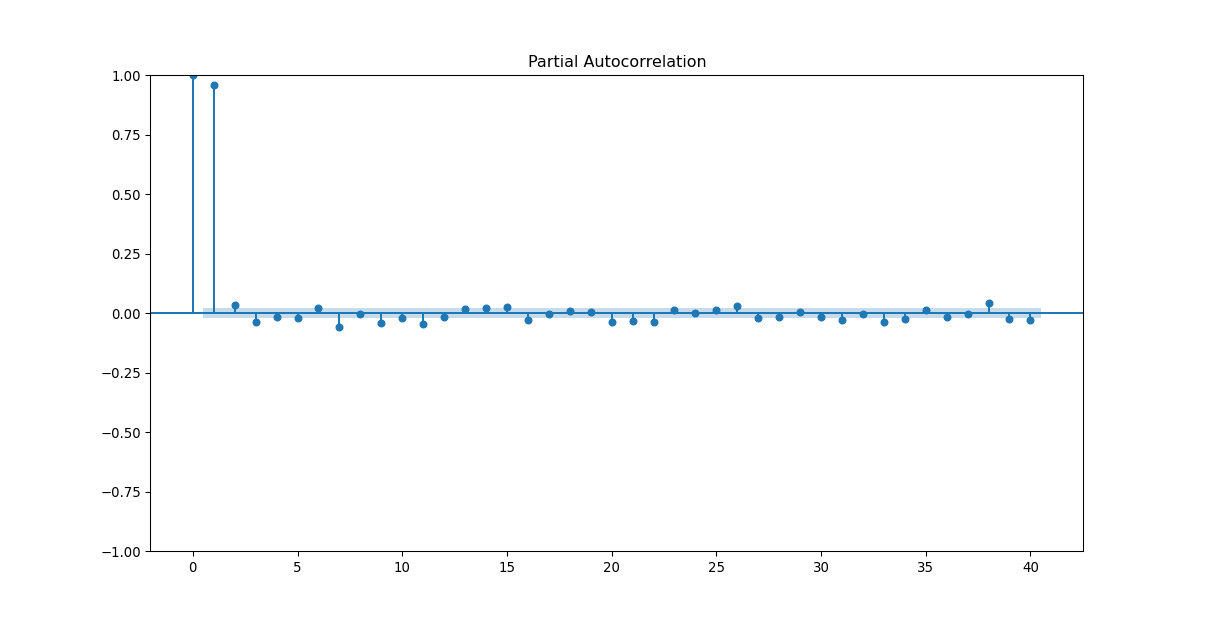

In [36]:
acf_plot = plot_acf(training_data['Benzene(µg/m3)'])
pacf_plot = plot_pacf(training_data['Benzene(µg/m3)'])

In [37]:
adf_test = adfuller(training_data['Benzene(µg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 2.90184379885703e-25


In [38]:
from pmdarima.arima import auto_arima

def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=7, max_q=3, d=0, test="adf", trace = True)
    return autoarima_model

In [39]:
arima_model = arimamodel(training_data['Benzene(µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-24923.068, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-45450.964, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-32829.977, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3853.394, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-45459.655, Time=0.71 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-45468.624, Time=1.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-45468.220, Time=1.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-45461.363, Time=1.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-45456.097, Time=1.76 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-45461.301, Time=1.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.98 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 12.114 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(3, 0, 0)   Log Likelihood               22739.312
Date:                Wed, 28 Jun 2023   AIC                         -45468.624
Time:                        06:43:27   BIC                         -45433.663
Sample:                    02-01-2023   HQIC                        -45456.661
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0075      0.000     18.586      0.000       0.007       0.008
ar.L1          0.9253      0.004    247.635      0.000       0.918       0.933
ar.L2          0.0707      0.006     12.846      0.000       0.060       0.081
ar.L3         -0.0369      0.004     -8.455      0.000      -0.045      -0.028
sigma2         0.0002    6.7e-07    305.198      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            829229.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
test_auto = arima_model.predict(n_periods = len(testing_data['Benzene(µg/m3)']))
df['Benzene forecast'] = [None]*len(training_data['Benzene(µg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


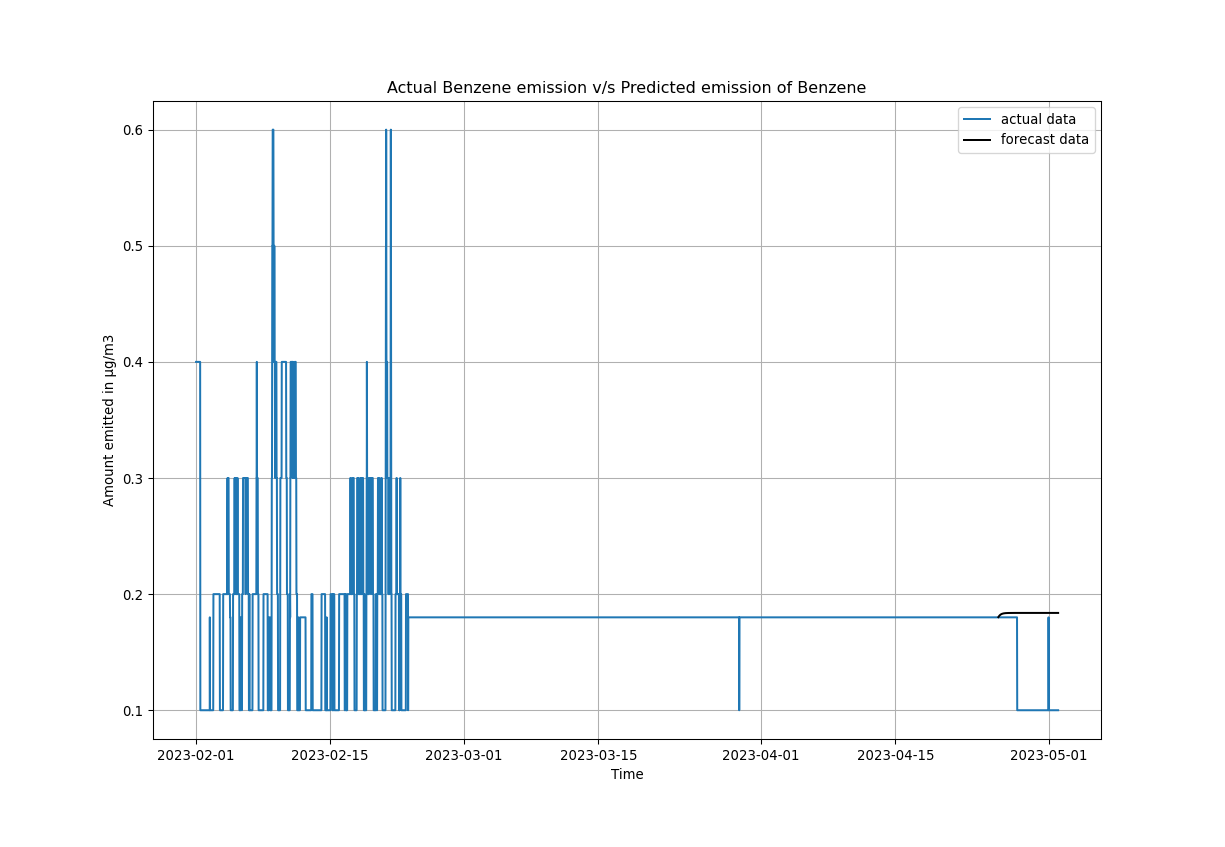

In [41]:
%matplotlib notebook
plt.plot(BENZENE, label='actual data')
plt.plot(df['Benzene forecast'], label='forecast data', color = 'black')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual Benzene emission v/s Predicted emission of Benzene')
plt.grid()
plt.legend()
plt.show()

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


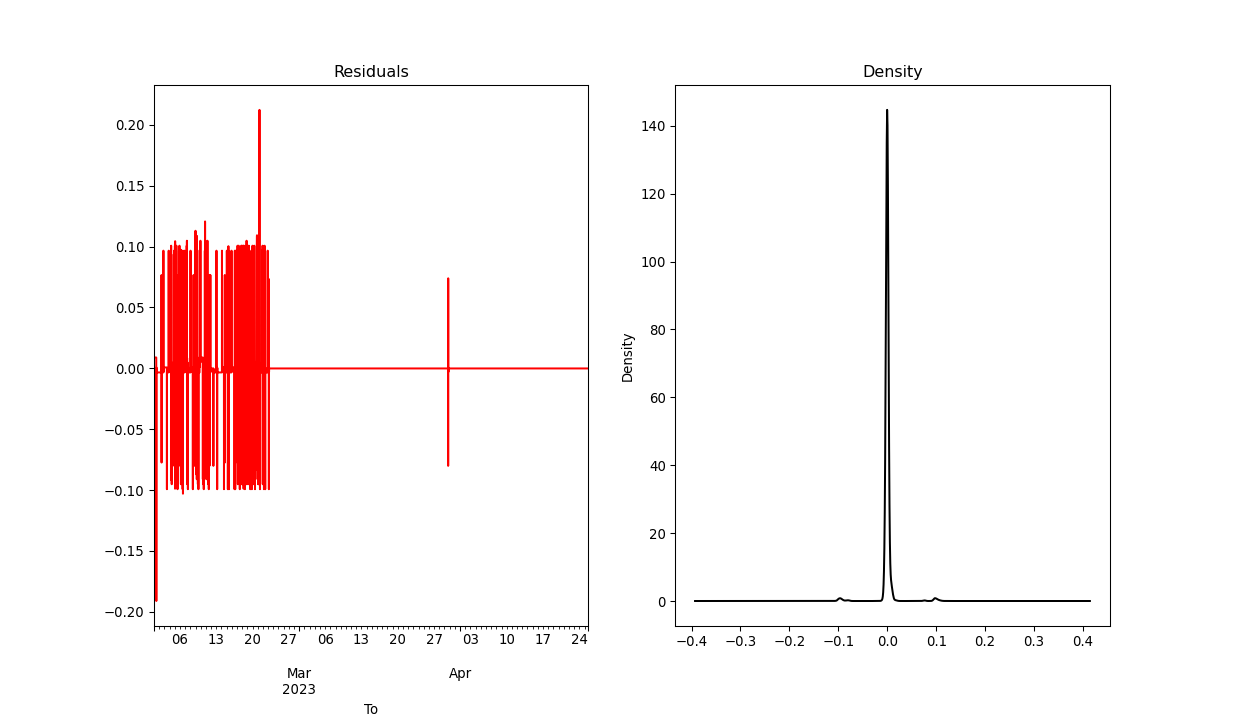

In [63]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(training_data['Benzene(µg/m3)'], order=(3, 0, 0))  # Replace p, d, q with appropriate values
arima_model_fit = arima_model.fit()

# Access the residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals' , ax = ax[0] ,color = 'r')
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1], color = 'black')
plt.show()

White noise residue

In [62]:
mae = mean_absolute_error(testing_data['Benzene(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['Benzene(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['Benzene(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 0.05845938839216231
mape : 0.5799223209374149
rmse : 0.06938999988304187


Our error is pretty less for Benzene. We will go through interpolation and check whether we can improve our prediction or not 